In [189]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [190]:
#Загрука данных 
Data = pd.read_csv("Parsing_Cian.csv", sep = ',')

### Взглянем на Фрейм

In [191]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                7592 non-null   object
 1   author_type           7595 non-null   object
 2   url                   7906 non-null   object
 3   location              7906 non-null   object
 4   deal_type             7906 non-null   object
 5   accommodation_type    7906 non-null   object
 6   floor                 7906 non-null   object
 7   floors_count          7906 non-null   object
 8   rooms_count           7906 non-null   object
 9   total_meters          7906 non-null   object
 10  price                 7893 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null   

### Избавимся от дубиликатов

In [192]:
Data.drop_duplicates()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,МИЭЛЬ,real_estate_agent,https://mytishchi.cian.ru/sale/flat/308939371/,Мытищи,sale,flat,8,14,2,69.7,...,-1,38 м²,"10,5 м²",79672094035,-1,NaN,Юбилейная,6,Медведково,Ярославский
8389,ПИК,developer,https://mytishchi.cian.ru/sale/flat/306943495/,Мытищи,sale,flat,19,25,2,48.1,...,Чистовая,"22,7 м²","16,1 м²",74951370494,"2,62 м",NaN,NaN,NaN,Ростокино,Ярославский квартал ЖК
8390,ID 47276638,homeowner,https://mytishchi.cian.ru/sale/flat/294184046/,Мытищи,sale,flat,3,5,2,45.0,...,-1,-1,6 м²,79153266030,-1,NaN,Юбилейная,11к3,Медведково,NaN
8391,EstateLiga,real_estate_agent,https://mytishchi.cian.ru/sale/flat/304572510/,Мытищи,sale,flat,3,6,2,34.0,...,-1,19 м²,8 м²,79651097781,"2,75 м",NaN,бульвар Тенистый,5,Медведково,Императорские Мытищи


## Обозначение Колонок


* url - ссылка
* location           - локация объявления (город)
* deal_type          - тип объявления (продажа/аренда)
* accommodation_type - тип жилья (квартира, дом и т.д.)
* floor	           - этаж квартиры
* floors_count	   - количество этажей
* total_meters	   - площадь квартиры
* price	           - общая стоимость
* seller- 	является ли продавец агентом
* year_of_construction	год постройки здания
* object_type	тип жилья (новостройка\вторичка)
* have_loggia	наличие лоджий\балконов
* house_material_type	тип дома (монолитный, панельный и т.д.)
* heating_type	тип отопления
* finish_type	отделка
* living_meters	жилая площадь
* kitchen_meters	площадь кухни
* phone	номер телефона
* ceiling_height	высота потолка
* district	район
* street	улица
* house_number	номер дома
* underground	метро (+ мцд)
* residential_complex	жилой комплекс

In [195]:
# Выыедим первые 8 строк 
Data.head(8)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN


In [196]:
show = Data.shape
print(f"В Датафрейме Колонок:{show[1]}  Строк:{show[0]}")

В Датафрейме Колонок:27  Строк:8393


### Проанализиурем и определим колонки кторые влияют или могут влиять на цену квартиры

Согласно статьи из сайта по поиску, продаже и подборe квартиры ЦИАН 
https://www.cian.ru/blogs-kakie-faktory-vlijajut-na-rynochnuju-stoimost-kvartiry-273638/
на цену могут влиять следующие факторы :

* Метраж Кухни
* Наличие парковки и её тип
* Этаж расположения квартиры
* Общее количество этажей
* Отделка 
* Новостройка/Вторичка
* Год Постройки 
* Удалённость от Метро
* Наличие Балкона 



Исходя из времени работы компании на рынке недвижемости и отзовы о работе платформы, можно опираться на их даннын при анализе колонок .

Определим колонки которые могут влиять на цену квартиры 

Колонки : 


* residential_complex - название жилого комплекса , 
* district            - район, 
* phone               - Телефон,
* street              - Улица
* url                 - ссылка.
* deal_type           - Тип сделки 
* accommodation_type  - Тип Размещения
* house_number        - Номер Дома 
* heating_type        - Отопление

никак не влияют на цену квартиры, удаляем их 

In [204]:
#Удаляем ненужные колонки
Data_Purified = Data.drop(["residential_complex", "district", "phone", "street", "url", "deal_type", "accommodation_type" , "location", "house_number", "author", "author_type", "heating_type"] , axis = 1)

In [205]:
Data_Purified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   floor                 7906 non-null   object
 1   floors_count          7906 non-null   object
 2   rooms_count           7906 non-null   object
 3   total_meters          7906 non-null   object
 4   price                 7893 non-null   object
 5   year_of_construction  7906 non-null   object
 6   object_type           7906 non-null   object
 7   have_loggia           7906 non-null   object
 8   parking_type          7906 non-null   object
 9   house_material_type   7906 non-null   object
 10  finish_type           7906 non-null   object
 11  living_meters         7906 non-null   object
 12  kitchen_meters        7906 non-null   object
 13  ceiling_height        7906 non-null   object
 14  underground           5511 non-null   object
dtypes: object(15)
memory usage: 983.7+ KB


## Обработаем Данные 


Согласно описанию библиотеки по сбору данных отсутсвующие значения заменялись на '-1' Заменим их на NaN

In [208]:
Data_Purified.replace("-1", np.nan, inplace = True) 

Посмотрим количество нулевых значений и пропусков

<Axes: >

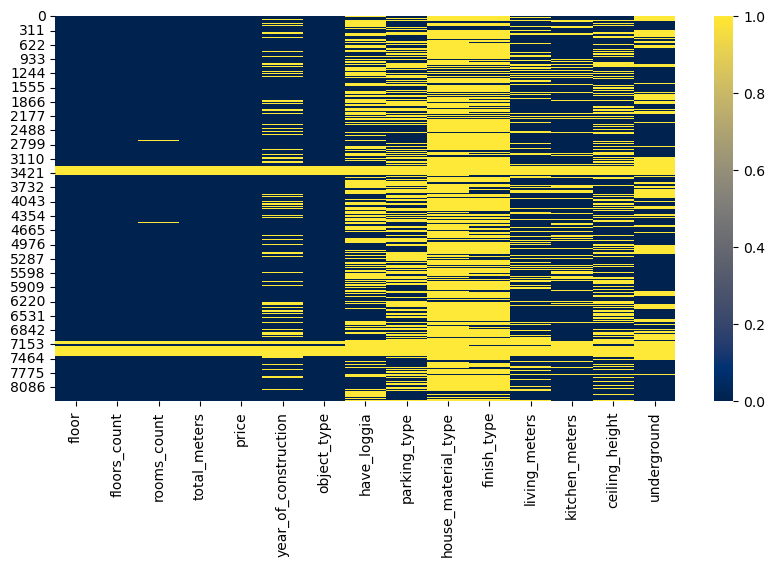

In [210]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='cividis')

In [211]:
null_ = Data_Purified.isnull().sum().reset_index()
null_.columns = ['Колонки', 'NaN']
print(null_)

                 Колонки   NaN
0                  floor   487
1           floors_count   487
2            rooms_count   587
3           total_meters   487
4                  price   500
5   year_of_construction  1856
6            object_type   487
7            have_loggia  3895
8           parking_type  3981
9    house_material_type  6946
10           finish_type  6387
11         living_meters  2269
12        kitchen_meters  1838
13        ceiling_height  3258
14           underground  2882


### В колонках house_material_type и finish_type много пропусков удаляем колонки

In [212]:
Data_Purified.drop(["house_material_type", "finish_type"], axis = 1 , inplace = True )

In [213]:
Data_Purified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   floor                 7906 non-null   object
 1   floors_count          7906 non-null   object
 2   rooms_count           7806 non-null   object
 3   total_meters          7906 non-null   object
 4   price                 7893 non-null   object
 5   year_of_construction  6537 non-null   object
 6   object_type           7906 non-null   object
 7   have_loggia           4498 non-null   object
 8   parking_type          4412 non-null   object
 9   living_meters         6124 non-null   object
 10  kitchen_meters        6555 non-null   object
 11  ceiling_height        5135 non-null   object
 12  underground           5511 non-null   object
dtypes: object(13)
memory usage: 852.5+ KB


In [214]:
null_ = Data_Purified.isnull().sum().reset_index()
null_.columns = ['Колонки', 'NaN']
print(null_)

                 Колонки   NaN
0                  floor   487
1           floors_count   487
2            rooms_count   587
3           total_meters   487
4                  price   500
5   year_of_construction  1856
6            object_type   487
7            have_loggia  3895
8           parking_type  3981
9          living_meters  2269
10        kitchen_meters  1838
11        ceiling_height  3258
12           underground  2882


#### Визуализация пропусков

<Axes: >

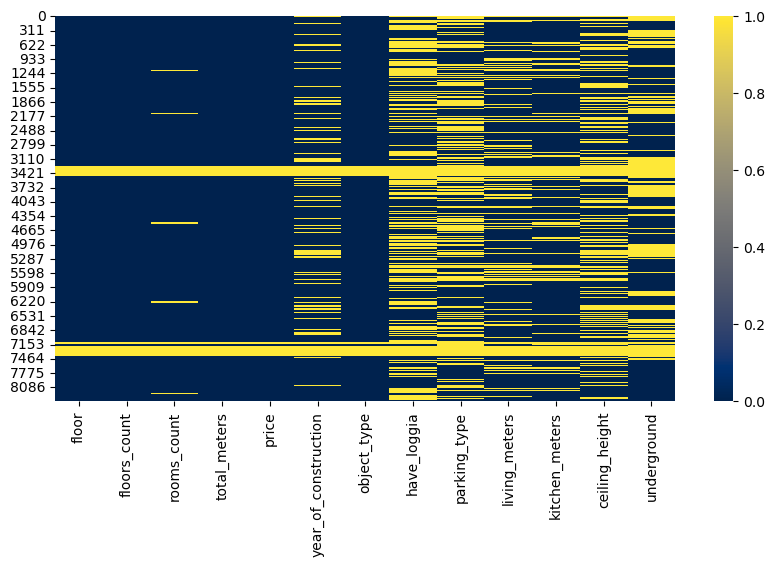

In [215]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='cividis')

## Обработка Данных 

Data_Purified.info()

Посмотрим колонки которые должны иметь числовые значения 

* floor-
* floors_count
* rooms_count
* total_meters
* price
* kitchen_meters
* ceiling_height
* living_meters
* year_of_construction  

In [220]:
Data_Purified["floor"].unique()

array(['6', '1', '4', '5', '2', '3', '15', '8', '7', '9', '18', '13',
       '10', '11', '35', '22', '12', '20', '14', '19', '37', '24', '28',
       '17', '34', '16', '40', '21', '41', '30', '33', '29', '23', '25',
       '26', '75', '62', '31', '46', '48', '80', '53', '38', '27', '57',
       '59', '32', '36', '47', '82', nan, '39', '79', 'floor', '66', '60',
       '51'], dtype=object)

### Столбец имеет значемние анамалиюю floor обработаем и удалим его 

In [222]:
index = Data_Purified[Data_Purified["floor"] == "floor"].index

In [223]:
Data_Purified.drop(index , inplace=True ) 

In [224]:
Data_Purified["floor"] = Data_Purified["floor"].astype(float)

In [227]:
Data_Purified["floors_count"].unique()

array(['6', '9', '4', '5', '7', '3', '2', '17', '10', '24', '1', '14',
       '18', '12', '23', '20', '41', '21', '43', '8', '59', '40', '27',
       '15', '13', '16', '22', '29', '25', '30', '49', '31', '39', '53',
       '28', '85', '35', '26', '32', '34', '57', '19', '11', '36', '68',
       '38', '51', '78', '79', '47', '33', '64', '75', '45', '37', '63',
       '95', '52', '54', '77', '46', '44', '67', '50', '48', '76', '42',
       '55', '56', nan, '97', '65', '66'], dtype=object)

In [231]:
Data_Purified["floors_count"] = Data_Purified["floors_count"].astype(float)

In [232]:
Data_Purified["floors_count"]

0        6.0
1        9.0
2        4.0
3        5.0
4        7.0
        ... 
8388    14.0
8389    25.0
8390     5.0
8391     6.0
8392    16.0
Name: floors_count, Length: 8392, dtype: float64

In [233]:
Data_Purified["rooms_count"].unique()

array(['1', '2', nan, '3', '4', '5'], dtype=object)

In [234]:
Data_Purified["rooms_count"] = Data_Purified["rooms_count"].astype(float)

In [235]:
Data_Purified["rooms_count"].unique()

array([ 1.,  2., nan,  3.,  4.,  5.])

In [236]:
Data_Purified["rooms_count"] 

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8388    2.0
8389    2.0
8390    2.0
8391    2.0
8392    2.0
Name: rooms_count, Length: 8392, dtype: float64

In [237]:
Data_Purified["total_meters"].unique()

array(['20.7', '33.0', '14.0', ..., '30.47', '36.79', '48.39'],
      dtype=object)

In [238]:
Data_Purified["total_meters"] = Data_Purified["total_meters"].astype(float)

In [239]:
Data_Purified["total_meters"]

0       20.7
1       33.0
2       14.0
3       17.5
4       25.9
        ... 
8388    69.7
8389    48.1
8390    45.0
8391    34.0
8392    58.6
Name: total_meters, Length: 8392, dtype: float64

In [240]:
Data_Purified["price"].unique()

array(['2350000', '4150000', '1700000', ..., '9865233', '8607014',
       '13014356'], dtype=object)

In [241]:
Data_Purified["price"] = Data_Purified["price"].astype(float)

In [242]:
Data_Purified["price"].info()

<class 'pandas.core.series.Series'>
Index: 8392 entries, 0 to 8392
Series name: price
Non-Null Count  Dtype  
--------------  -----  
7892 non-null   float64
dtypes: float64(1)
memory usage: 131.1 KB


In [243]:
Data_Purified["kitchen_meters"].unique()

array(['1\xa0м²', '6\xa0м²', nan, '5\xa0м²', '5,6\xa0м²', '16\xa0м²',
       '3\xa0м²', '6,2\xa0м²', '7\xa0м²', '7,3\xa0м²', '6,1\xa0м²',
       '10\xa0м²', '9\xa0м²', '8\xa0м²', '5,7\xa0м²', '11\xa0м²',
       '7,5\xa0м²', '13,5\xa0м²', '6,5\xa0м²', '5,8\xa0м²', '20\xa0м²',
       '11,2\xa0м²', '7,8\xa0м²', '4\xa0м²', '7,9\xa0м²', '4,1\xa0м²',
       '12\xa0м²', '7,7\xa0м²', '8,1\xa0м²', '9,3\xa0м²', '10,2\xa0м²',
       '10,6\xa0м²', '8,5\xa0м²', '9,1\xa0м²', '4,5\xa0м²', '6,7\xa0м²',
       '45\xa0м²', '34,3\xa0м²', '25,5\xa0м²', '46,2\xa0м²', '4,9\xa0м²',
       '8,4\xa0м²', '24,9\xa0м²', '15\xa0м²', '15,8\xa0м²', '11,5\xa0м²',
       '5,5\xa0м²', '10,7\xa0м²', '19,4\xa0м²', '43,8\xa0м²',
       '44,5\xa0м²', '22,4\xa0м²', '25\xa0м²', '28,4\xa0м²', '19\xa0м²',
       '21\xa0м²', '5,1\xa0м²', '18,3\xa0м²', '3,8\xa0м²', '19,2\xa0м²',
       '16,2\xa0м²', '21,7\xa0м²', '12,5\xa0м²', '15,4\xa0м²', '28\xa0м²',
       '17\xa0м²', '10,4\xa0м²', '13,6\xa0м²', '21,8\xa0м²', '14\xa0м²',
    

## Обработаем kitchen_meters

In [245]:
Data_Purified["kitchen_meters"] = Data_Purified["kitchen_meters"].str.replace('\xa0м²', '', regex=True).str.replace(',', '.')

In [246]:
Data_Purified["kitchen_meters"].unique()

array(['1', '6', nan, '5', '5.6', '16', '3', '6.2', '7', '7.3', '6.1',
       '10', '9', '8', '5.7', '11', '7.5', '13.5', '6.5', '5.8', '20',
       '11.2', '7.8', '4', '7.9', '4.1', '12', '7.7', '8.1', '9.3',
       '10.2', '10.6', '8.5', '9.1', '4.5', '6.7', '45', '34.3', '25.5',
       '46.2', '4.9', '8.4', '24.9', '15', '15.8', '11.5', '5.5', '10.7',
       '19.4', '43.8', '44.5', '22.4', '25', '28.4', '19', '21', '5.1',
       '18.3', '3.8', '19.2', '16.2', '21.7', '12.5', '15.4', '28', '17',
       '10.4', '13.6', '21.8', '14', '12.9', '13', '29.2', '23', '15.7',
       '2.9', '8.2', '2.4', '20.7', '4.3', '18', '21.3', '11.6', '16.8',
       '3.9', '9.9', '19.3', '11.3', '14.8', '17.1', '21.4', '8.9',
       '18.2', '13.4', '16.4', '16.5', '8.7', '9.8', '10.8', '18.5',
       '16.1', '13.2', '8.6', '4.8', '9.5', '6.3', '3.5', '43', '65',
       '9.2', '12.7', '10.1', '7.1', '12.8', '10.5', '25.6', '6.4', '7.2',
       '9.7', '15.2', '7.6', '9.6', '3.2', '7.4', '5.2', '6.6', '2',


In [247]:
Data_Purified["kitchen_meters"] = Data_Purified["kitchen_meters"].astype(float)

In [248]:
Data_Purified["kitchen_meters"]

0        1.0
1        6.0
2        NaN
3        NaN
4        5.0
        ... 
8388    10.5
8389    16.1
8390     6.0
8391     8.0
8392    21.4
Name: kitchen_meters, Length: 8392, dtype: float64

In [249]:
Data_Purified["living_meters"].unique()

array(['18\xa0м²', nan, '20\xa0м²', '25\xa0м²', '29,7\xa0м²',
       '24,9\xa0м²', '13,4\xa0м²', '14,1\xa0м²', '28\xa0м²', '15\xa0м²',
       '19\xa0м²', '16\xa0м²', '40\xa0м²', '45\xa0м²', '50\xa0м²',
       '44\xa0м²', '39\xa0м²', '41\xa0м²', '32,5\xa0м²', '27,4\xa0м²',
       '17\xa0м²', '33\xa0м²', '27\xa0м²', '34\xa0м²', '30\xa0м²',
       '30,7\xa0м²', '29\xa0м²', '38\xa0м²', '28,9\xa0м²', '26\xa0м²',
       '18,1\xa0м²', '13\xa0м²', '18,2\xa0м²', '9\xa0м²', '14\xa0м²',
       '11,4\xa0м²', '19,3\xa0м²', '20,7\xa0м²', '32\xa0м²', '28,6\xa0м²',
       '41,5\xa0м²', '31,2\xa0м²', '56,5\xa0м²', '48,8\xa0м²', '37\xa0м²',
       '50,5\xa0м²', '37,7\xa0м²', '39,4\xa0м²', '52\xa0м²', '52,1\xa0м²',
       '39,1\xa0м²', '35,2\xa0м²', '69\xa0м²', '35,7\xa0м²', '36,1\xa0м²',
       '23,4\xa0м²', '26,8\xa0м²', '18,8\xa0м²', '45,8\xa0м²',
       '32,8\xa0м²', '6,3\xa0м²', '10,5\xa0м²', '28,2\xa0м²',
       '13,5\xa0м²', '15,2\xa0м²', '10,3\xa0м²', '12,8\xa0м²',
       '70,9\xa0м²', '46,6\xa0м

### обработаем living_meters

In [251]:
Data_Purified["living_meters"] =  Data_Purified["living_meters"].str.replace('\xa0м²' , "", regex=True).str.replace(",", ".")

In [252]:
Data_Purified["living_meters"]

0         18
1         18
2        NaN
3        NaN
4         20
        ... 
8388      38
8389    22.7
8390     NaN
8391      19
8392    24.9
Name: living_meters, Length: 8392, dtype: object

In [253]:
Data_Purified["living_meters"] = Data_Purified["living_meters"].astype(float)

In [254]:
Data_Purified["living_meters"].info()

<class 'pandas.core.series.Series'>
Index: 8392 entries, 0 to 8392
Series name: living_meters
Non-Null Count  Dtype  
--------------  -----  
6123 non-null   float64
dtypes: float64(1)
memory usage: 131.1 KB


## Обработаем ceiling_height

In [256]:
Data_Purified["ceiling_height"] =  Data_Purified["ceiling_height"].str.replace('\xa0м' , "", regex=True).str.replace(",", ".")

In [257]:
Data_Purified["ceiling_height"] = Data_Purified["ceiling_height"].astype(float)

In [260]:
Data_Purified["year_of_construction"].unique()  

array(['1917', '1975', nan, '1968', '2009', '1969', '1980', '1990',
       '1964', '2025', '2015', '1970', '1984', '1965', '2010', 'Аукцион',
       '1992', '2011', '1986', '1994', '1956', '1966', '1973', '1971',
       '1957', '2013', '1981', '1972', '1959', '2004', '1962', '2019',
       '1978', '1977', '2003', '1963', '1952', '2024', '2007', '1995',
       '1976', '1982', '1953', '2008', '2026', '2023', '1941', '2028',
       '1993', '2016', '2027', '2017', '2022', '1932', '2012', '1960',
       '2006', '1926', '2020', '1943', '2014', '2021', '1967', '1904',
       '1991', '2018', '1987', '1988', '1974', 'Напишите автору', '1979',
       '1929', '1989', '1985', '1930', '2005', '1958', '1996', '1940',
       '1948', '1961', '1938', '1997', '2002', '2001', '1999', '1983',
       '1998', '1902', '2000', '1915', '1910', '1939', '1954', '1897',
       '1955', '1900', 'Позвоните автору', '1949', '1947', '1901', '1909',
       '1600', '1951', '1936', '1931', '1950', '1934', '1928', '1945',

## Заметим анамалии "Аукцион, Позвоните автору, Позвоните автору" обработаем и удалим  их 


In [262]:

index = Data_Purified[Data_Purified["year_of_construction"].isin(["Аукцион", "Позвоните автору", "Напишите автору"])].index

In [263]:
Data_Purified = Data_Purified.drop(index)

In [264]:
Data_Purified["year_of_construction"].unique()

array(['1917', '1975', nan, '1968', '2009', '1969', '1980', '1990',
       '1964', '2025', '2015', '1970', '1984', '1965', '2010', '1992',
       '2011', '1986', '1994', '1956', '1966', '1973', '1971', '1957',
       '2013', '1981', '1972', '1959', '2004', '1962', '2019', '1978',
       '1977', '2003', '1963', '1952', '2024', '2007', '1995', '1976',
       '1982', '1953', '2008', '2026', '2023', '1941', '2028', '1993',
       '2016', '2027', '2017', '2022', '1932', '2012', '1960', '2006',
       '1926', '2020', '1943', '2014', '2021', '1967', '1904', '1991',
       '2018', '1987', '1988', '1974', '1979', '1929', '1989', '1985',
       '1930', '2005', '1958', '1996', '1940', '1948', '1961', '1938',
       '1997', '2002', '2001', '1999', '1983', '1998', '1902', '2000',
       '1915', '1910', '1939', '1954', '1897', '1955', '1900', '1949',
       '1947', '1901', '1909', '1600', '1951', '1936', '1931', '1950',
       '1934', '1928', '1945', '1937', '1927', '1896', '1777', '2031',
       '1

In [265]:
Data_Purified["year_of_construction"] = Data_Purified["year_of_construction"].astype(float)

## Обработаем Пропуски 

#### Обработаем Пропуски в колонках 

 * parking_type
 * underground
 * have_loggia
 * object_type

In [271]:
Data_Purified.head(8)

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground
0,6.0,6.0,1.0,20.7,2350000.0,1917.0,Вторичка,NaN,Наземная,18.0,1.0,3.0,NaN
1,1.0,9.0,1.0,33.0,4150000.0,1975.0,Вторичка,NaN,NaN,18.0,6.0,2.7,Аннино
2,4.0,4.0,1.0,14.0,1700000.0,NaN,Вторичка,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,1.0,17.5,2500000.0,1968.0,Вторичка,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,7.0,1.0,25.9,3000000.0,2009.0,Вторичка,NaN,Наземная,20.0,5.0,3.5,NaN
5,2.0,3.0,1.0,46.7,6599999.0,NaN,Вторичка,NaN,NaN,25.0,6.0,NaN,NaN
6,3.0,5.0,1.0,29.0,3350000.0,1917.0,Вторичка,NaN,Наземная,25.0,NaN,3.0,NaN
7,3.0,6.0,1.0,19.1,3600000.0,1917.0,Вторичка,NaN,NaN,NaN,NaN,NaN,NaN


##### Пропуски в процентном соотношении

In [272]:
Data_Purified[["parking_type", "underground", "have_loggia"]].isnull().mean()*100

parking_type    47.374101
underground     34.280576
have_loggia     46.486811
dtype: float64

In [273]:
Data_Purified["parking_type"].unique()

array(['Наземная', nan, 'Многоуровневая', 'Подземная', 'Открытая'],
      dtype=object)

In [274]:
Data_Purified["underground"].unique()

array([nan, 'Аннино', 'Силикатная', 'Поклонная', 'Белорусская',
       'Бауманская', 'Тульская', 'Фили', 'Аэропорт', 'Улица 1905 года',
       'Смоленская', 'Дмитровская', 'Давыдково', 'Маяковская', 'ЦСКА',
       'Улица Академика Янгеля', 'Лермонтовский проспект',
       'Зеленоград — Крюково', 'Говорово', 'Цветной бульвар', 'Ясенево',
       'Преображенская площадь', 'Юго-Западная', 'Новые Черёмушки',
       'Гражданская', 'Октябрьское поле', 'ЗИЛ', 'Орехово', 'Рассказовка',
       'Арбатская', 'Аминьевская', 'Полянка', 'Кунцевская',
       'Марьина Роща', 'Трубная', 'Речной вокзал', 'Павелецкая',
       'Ломоносовский проспект', 'Молодёжная', 'Щукинская',
       'Авиамоторная', 'Москва-Сити', 'Новокузнецкая', 'Алексеевская',
       'Пушкинская', 'Сокольники', 'Нагатинская', 'Шелепиха',
       'Сухаревская', 'Парк Победы', 'Крёкшино', 'Солнцево',
       'Бунинская аллея', 'Кедровая', 'Филатов Луг', 'Щербинка',
       'Новомосковская', 'Воронцовская', 'Парк Культуры', 'Фрунзенская',
 

In [275]:
Data_Purified["object_type"].unique()

array(['Вторичка', 'Новостройка', 'Вторичка / Апартаменты',
       'Новостройка / Апартаменты', 'Вторичка / Пентхаус',
       'Новостройка / Пентхаус', nan], dtype=object)

### В Колонках "parking_type", "underground", "have_loggia" пропуски заменим не "нет" так как есть дома без парковки, квартиры без лоджи и не везде близко метро 

In [277]:
Data_Purified["parking_type"] = Data_Purified["parking_type"].fillna("0")

#### В колонке underground переведём данные в 0-1 есть метро или попросту отсуствует 

In [278]:
Data_Purified["underground"] = Data_Purified["underground"].apply( lambda x : 0 if pd.isna(x) else 1)

In [279]:
Data_Purified["have_loggia"]  = Data_Purified["have_loggia"].fillna("0")

<Axes: >

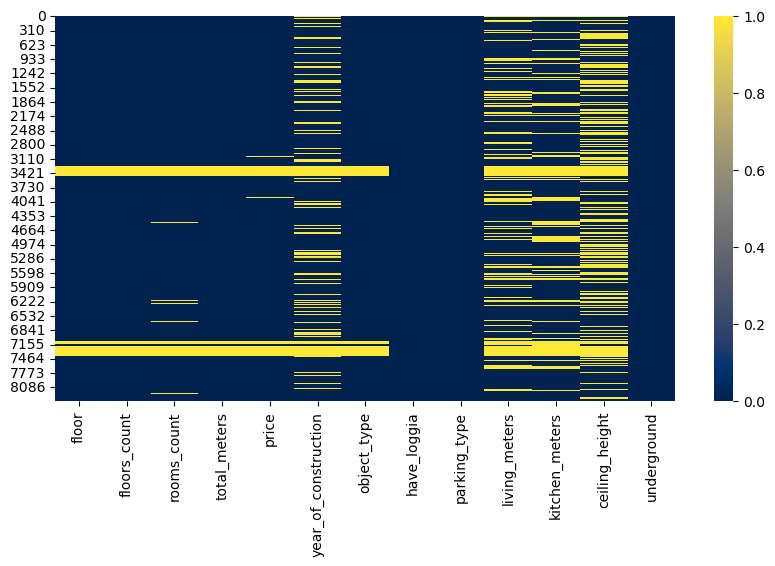

In [280]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='cividis')

#### Обработаем Пропуски в колонках 

* floor
* floors_count
* rooms_count

In [283]:
Data_Purified["floor"].describe()

count    7853.000000
mean        7.362537
std         6.646262
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        82.000000
Name: floor, dtype: float64

#### Пропуски в коолонки floor, rooms_count, floors_count заполним с помощью sklearn.impute.SimpleImputer. средними значениями  

In [285]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
categorical_columns = ["floor", "floors_count", "rooms_count"]
Data_Purified[categorical_columns] = imputer.fit_transform(Data_Purified[categorical_columns].values)

<Axes: >

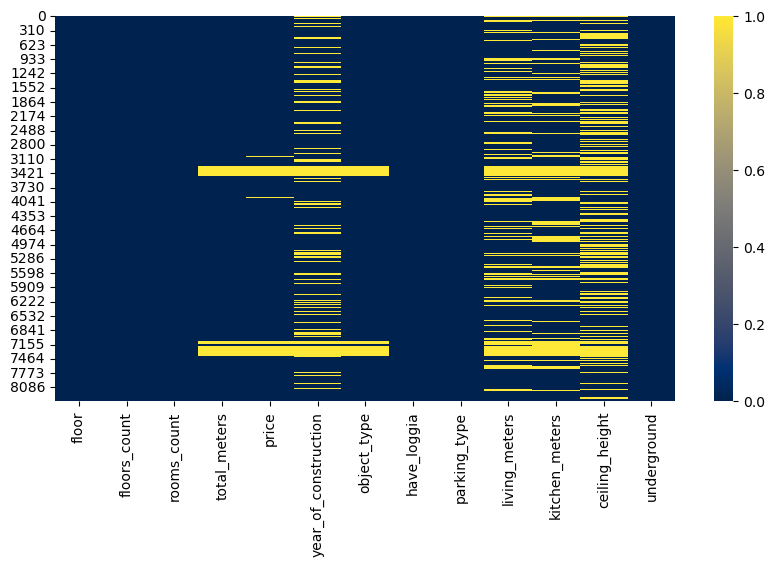

In [286]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='cividis')

## Рассмотрим колонкии 
 * total_meters Площадь квартиры,
 * living_meters-жилая площадь
 * kitchen_meters - площадь кухни

In [289]:
Data_Purified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8340 entries, 0 to 8392
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   floor                 8340 non-null   float64
 1   floors_count          8340 non-null   float64
 2   rooms_count           8340 non-null   float64
 3   total_meters          7853 non-null   float64
 4   price                 7840 non-null   float64
 5   year_of_construction  6484 non-null   float64
 6   object_type           7853 non-null   object 
 7   have_loggia           8340 non-null   object 
 8   parking_type          8340 non-null   object 
 9   living_meters         6078 non-null   float64
 10  kitchen_meters        6503 non-null   float64
 11  ceiling_height        5101 non-null   float64
 12  underground           8340 non-null   int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 912.2+ KB


In [290]:
Data_Purified[["total_meters", "living_meters", "kitchen_meters"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8340 entries, 0 to 8392
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_meters    7853 non-null   float64
 1   living_meters   6078 non-null   float64
 2   kitchen_meters  6503 non-null   float64
dtypes: float64(3)
memory usage: 260.6 KB


#### Пропуки в процентном соотношении

In [291]:
Data_Purified[["total_meters","kitchen_meters", "living_meters" ]].isnull().mean()*100

total_meters       5.839329
kitchen_meters    22.026379
living_meters     27.122302
dtype: float64

#### Визуализация Price

<Axes: xlabel='price', ylabel='total_meters'>

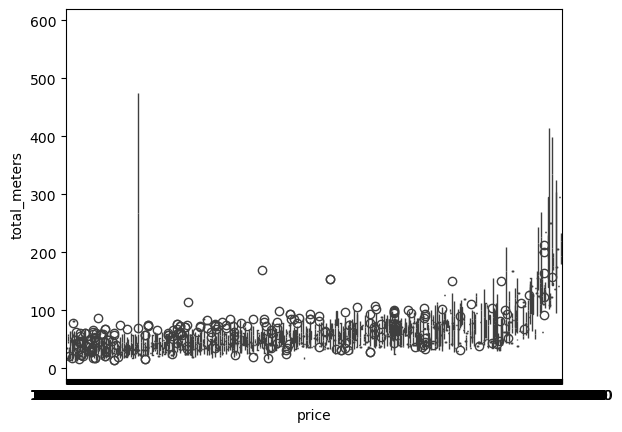

In [292]:
sns.boxplot(x = "price" ,y = "total_meters" ,data = Data_Purified )

### Взглянем на срелднее значения total_meters

In [293]:
Data_Purified["total_meters"].describe()

count    7853.000000
mean       51.089422
std        29.834247
min        10.800000
25%        35.000000
50%        44.100000
75%        59.800000
max       590.300000
Name: total_meters, dtype: float64

#### Визуализация kitchen_meters

<Axes: xlabel='price', ylabel='kitchen_meters'>

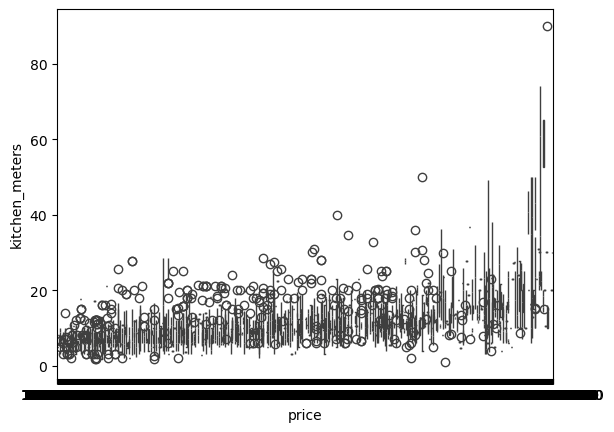

In [294]:
sns.boxplot(x = "price" ,y = "kitchen_meters" ,data = Data_Purified )

#### Среднее значения kitchen_meters

In [295]:
Data_Purified["kitchen_meters"].describe()

count    6503.000000
mean       10.512563
std         5.840368
min         1.000000
25%         6.600000
50%         9.500000
75%        12.100000
max        90.000000
Name: kitchen_meters, dtype: float64

<Axes: xlabel='price', ylabel='living_meters'>

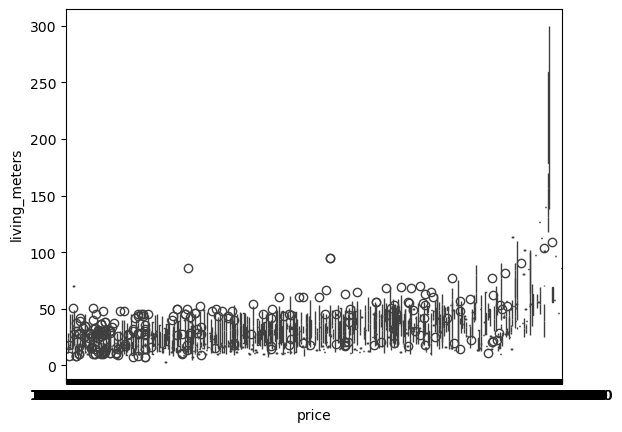

In [296]:
sns.boxplot(x = "price" ,y = "living_meters" ,data = Data_Purified )

### Среднее значение столбцов боле 50% заполним пропуски среднем значением 

In [298]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
categorical_columns = ["kitchen_meters", "living_meters", "total_meters"]
Data_Purified[categorical_columns] = imputer.fit_transform(Data_Purified[categorical_columns].values)

<Axes: >

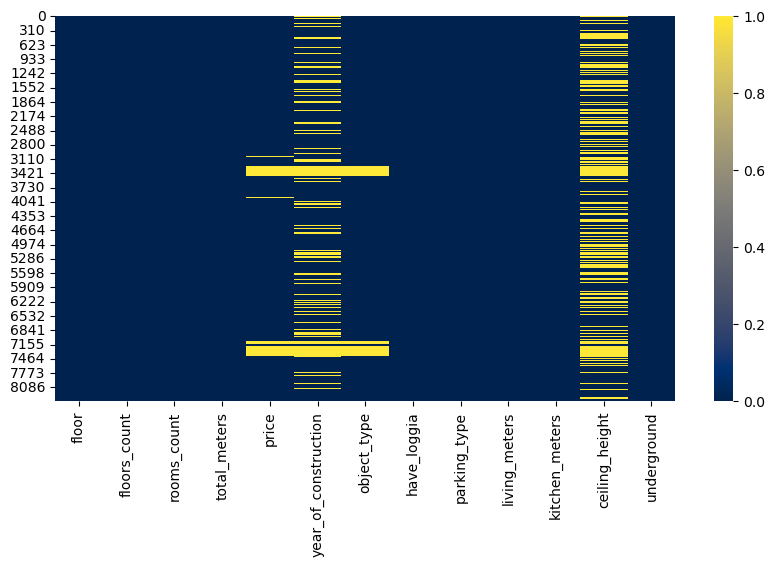

In [299]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='cividis')

#### Взглянем на ceiling_height

In [300]:
Data_Purified["ceiling_height"].describe()

count    5101.000000
mean        2.826332
std         0.811909
min         0.000000
25%         2.700000
50%         2.750000
75%         2.900000
max        52.000000
Name: ceiling_height, dtype: float64

<Axes: xlabel='price', ylabel='ceiling_height'>

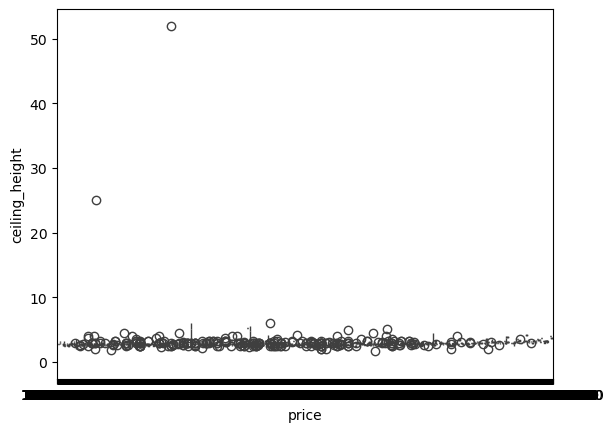

In [301]:
sns.boxplot(x = "price" ,y = "ceiling_height" ,data = Data_Purified )

#### Выведем 4 максимальных значения -ceiling_height

In [302]:
Data_Purified.loc[Data_Purified['ceiling_height'].nlargest(4).index]

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground
2250,1.0,2.0,2.0,58.3,5700000.0,1955.0,Вторичка,0,0,40.0,6.0,52.0,1
5121,5.0,5.0,1.0,31.9,3850000.0,1995.0,Вторичка,1 балкон,Наземная,17.7,5.3,25.0,0
5293,1.0,9.0,2.0,49.0,5449000.0,1990.0,Вторичка,1 балкон,Наземная,27.0,9.0,9.0,1
225,3.0,13.0,1.0,47.0,23876000.0,2025.0,Новостройка,1 балкон,Подземная,14.3,15.0,6.0,1


Строчки с индексами 2250 5121 скорее анамалии удалим их 

In [304]:
Data_Purified.drop(2250, inplace= True)

In [305]:
Data_Purified.drop(5121, inplace= True)

In [306]:
Data_Purified["ceiling_height"].describe()

count    5099.000000
mean        2.812340
std         0.297492
min         0.000000
25%         2.700000
50%         2.750000
75%         2.900000
max         9.000000
Name: ceiling_height, dtype: float64

In [307]:
Data_Purified["ceiling_height"] = Data_Purified["ceiling_height"].fillna(Data_Purified["ceiling_height"].mean()).round(2)

In [308]:
Data_Purified["ceiling_height"].isnull().mean()*100

0.0

Рассмотрим Price

In [310]:
Data_Purified["price"] = Data_Purified["price"].round(2)

In [311]:
Data_Purified["price"].isnull().mean()*100

5.9966418805468935

<Axes: xlabel='ceiling_height', ylabel='price'>

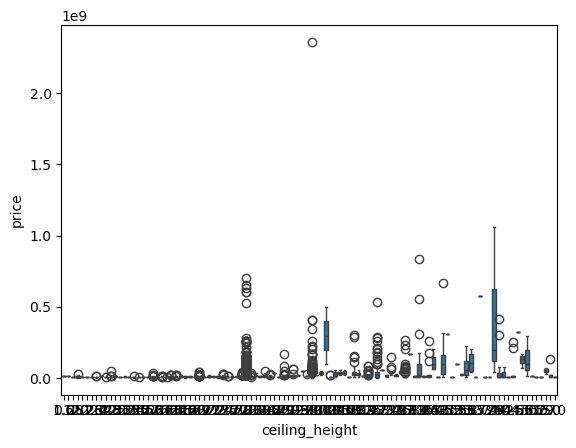

In [312]:
sns.boxplot(x = "ceiling_height" ,y = "price" ,data = Data_Purified )

In [313]:
Data_Purified.loc[Data_Purified['price'].nlargest(4).index]

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground
5851,5.0,5.0,5.0,590.3,2.361200e+09,2027.0,Новостройка,0,0,27.258128,10.512563,3.00,1
5853,66.0,66.0,5.0,588.1,1.058580e+09,2020.0,Новостройка / Апартаменты,0,0,27.258128,10.512563,3.90,1
5845,12.0,14.0,5.0,227.4,8.347600e+08,2024.0,Новостройка,1 балкон,Подземная,85.700000,55.100000,3.35,1
1172,10.0,11.0,5.0,352.0,7.041400e+08,2024.0,Новостройка,0,0,27.258128,10.512563,2.81,1


In [314]:
Data_drop_to_price = Data_Purified

In [315]:
Data_drop_to_price.loc[Data_Purified['price'].nlargest(4).index]

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground
5851,5.0,5.0,5.0,590.3,2.361200e+09,2027.0,Новостройка,0,0,27.258128,10.512563,3.00,1
5853,66.0,66.0,5.0,588.1,1.058580e+09,2020.0,Новостройка / Апартаменты,0,0,27.258128,10.512563,3.90,1
5845,12.0,14.0,5.0,227.4,8.347600e+08,2024.0,Новостройка,1 балкон,Подземная,85.700000,55.100000,3.35,1
1172,10.0,11.0,5.0,352.0,7.041400e+08,2024.0,Новостройка,0,0,27.258128,10.512563,2.81,1


In [316]:
Data_drop_to_price.drop(5845, inplace= True)

In [317]:
Data_drop_to_price.drop(1172, inplace= True)

In [318]:
mean_drop_price = Data_drop_to_price['price'].mean()

In [319]:
Data_Purified["price"] = Data_Purified["price"].fillna(mean_drop_price)
Data_Purified["price"] = Data_Purified["price"].apply(lambda x : int(x))

In [320]:
Data_Purified["price"].isnull().mean()*100

0.0

<Axes: >

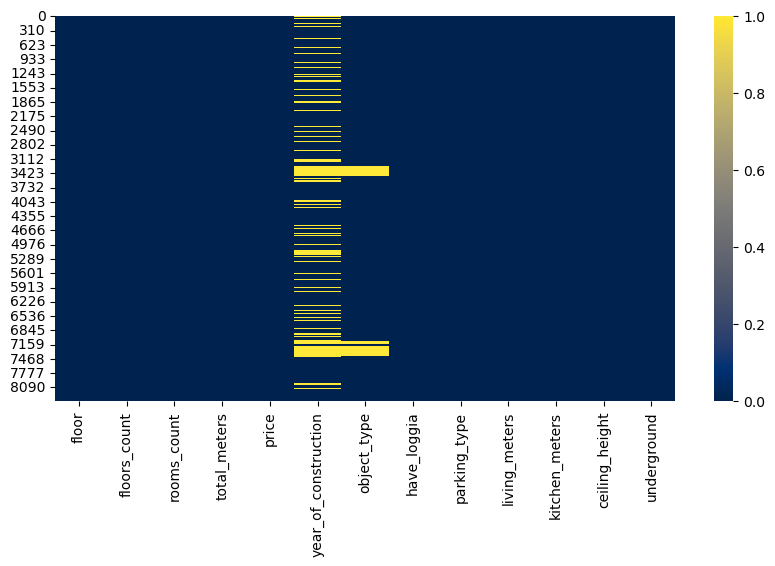

In [321]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='cividis')

#### Процент пропуска в object_type

In [322]:
Data_Purified["object_type"].isnull().mean()*100

5.842130518234165

#### Взглянем на уникальные значения object_type

In [323]:
Data_Purified["object_type"].unique()

array(['Вторичка', 'Новостройка', 'Вторичка / Апартаменты',
       'Новостройка / Апартаменты', 'Вторичка / Пентхаус',
       'Новостройка / Пентхаус', nan], dtype=object)

#### Обработаем колонку object_type, что бы остался только "Вторичка, Новостройка"

def proccessing_obgect_tipe(val):
    if isinstance(val, str):
        if val == "Вторичка":
            return val
        elif val == "Новостройка":
            return val 
        elif val == 'Вторичка / Апартаменты':
            return "Вторичка"
        elif val == 'Новостройка / Апартаменты':
            return "Новостройка"
        elif val == 'Вторичка / Пентхаус':
            return "Вторичка"
        elif val == "Новостройка / Пентхаус":
            return "Новостройка"
    else:
        return val
            
        
            

In [326]:
Data_Purified["object_type"] = Data_Purified["object_type"].apply(proccessing_obgect_tipe)

In [327]:
Data_Purified["object_type"].unique()

array(['Вторичка', 'Новостройка', nan], dtype=object)

#### Процент пропуска мал но для чичтоты удалии пропуски

In [328]:
index_drop = Data_Purified[Data_Purified["object_type"].isnull()].index

In [329]:
Data_Purified.drop(index_drop , inplace= True)

In [332]:
Data_Purified["object_type"].unique()

array(['Вторичка', 'Новостройка'], dtype=object)

Пройдёмся по колонке object_type перевидём в булевую константу 0-Вторичка, 1- Новостройка 

In [334]:
Data_Purified["object_type"] = Data_Purified["object_type"].apply(lambda x : 0 if x == "Вторичка" else 1)

In [335]:
Data_Purified["object_type"].unique()

array([0, 1], dtype=int64)

<Axes: >

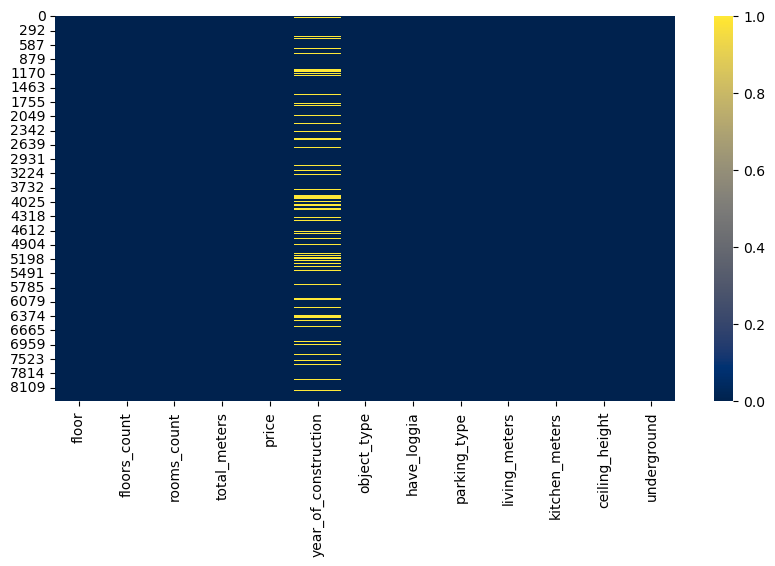

In [336]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='cividis')

Посмотрим колонку year_of_construction

In [338]:
Data_Purified["year_of_construction"]

0       1917.0
1       1975.0
2          NaN
3       1968.0
4       2009.0
         ...  
8388    2018.0
8389    2025.0
8390    1968.0
8391    2023.0
8392    2025.0
Name: year_of_construction, Length: 7849, dtype: float64

<Axes: xlabel='price', ylabel='year_of_construction'>

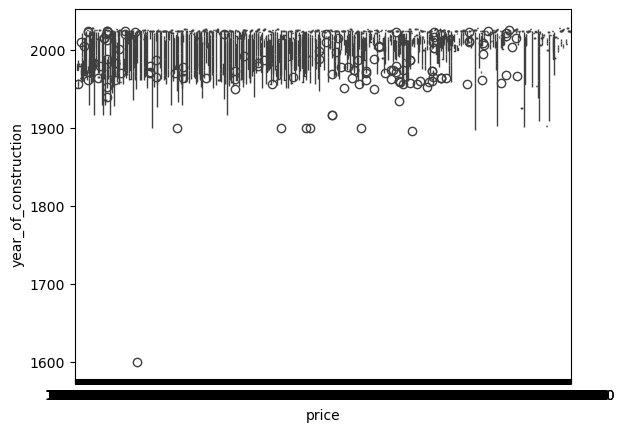

In [339]:
sns.boxplot(x = "price" ,y = "year_of_construction" ,data = Data_Purified )

Нас интересуют постройки приблежённые к нашему периоду возьмём переод с 1990 года по нынешний  2024

In [341]:
Data_Purified = Data_Purified[(Data_Purified["year_of_construction"] > 1990) & (Data_Purified["year_of_construction"] <= 2024)]



<Axes: xlabel='price', ylabel='year_of_construction'>

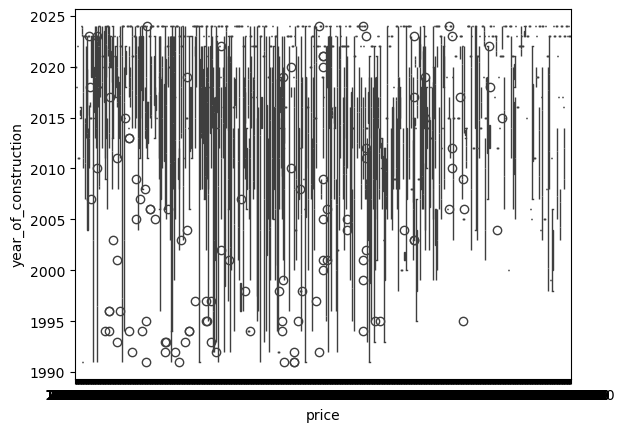

In [342]:
sns.boxplot(x = "price" ,y = "year_of_construction" ,data = Data_Purified )

Более приблежённые к реальности 

In [344]:
Data_Purified["year_of_construction"].unique()

array([2009., 2015., 2010., 1992., 2011., 1994., 2013., 2004., 2019.,
       2003., 2024., 2007., 1995., 2008., 2023., 1993., 2016., 2017.,
       2022., 2012., 2006., 2020., 2014., 2021., 1991., 2018., 2005.,
       1996., 1997., 2002., 2001., 1999., 1998., 2000.])

In [345]:
Data_Purified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3441 entries, 4 to 8391
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   floor                 3441 non-null   float64
 1   floors_count          3441 non-null   float64
 2   rooms_count           3441 non-null   float64
 3   total_meters          3441 non-null   float64
 4   price                 3441 non-null   int64  
 5   year_of_construction  3441 non-null   float64
 6   object_type           3441 non-null   int64  
 7   have_loggia           3441 non-null   object 
 8   parking_type          3441 non-null   object 
 9   living_meters         3441 non-null   float64
 10  kitchen_meters        3441 non-null   float64
 11  ceiling_height        3441 non-null   float64
 12  underground           3441 non-null   int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 376.4+ KB


In [346]:
Data_Purified.isnull().mean()*100

floor                   0.0
floors_count            0.0
rooms_count             0.0
total_meters            0.0
price                   0.0
year_of_construction    0.0
object_type             0.0
have_loggia             0.0
parking_type            0.0
living_meters           0.0
kitchen_meters          0.0
ceiling_height          0.0
underground             0.0
dtype: float64

<Axes: >

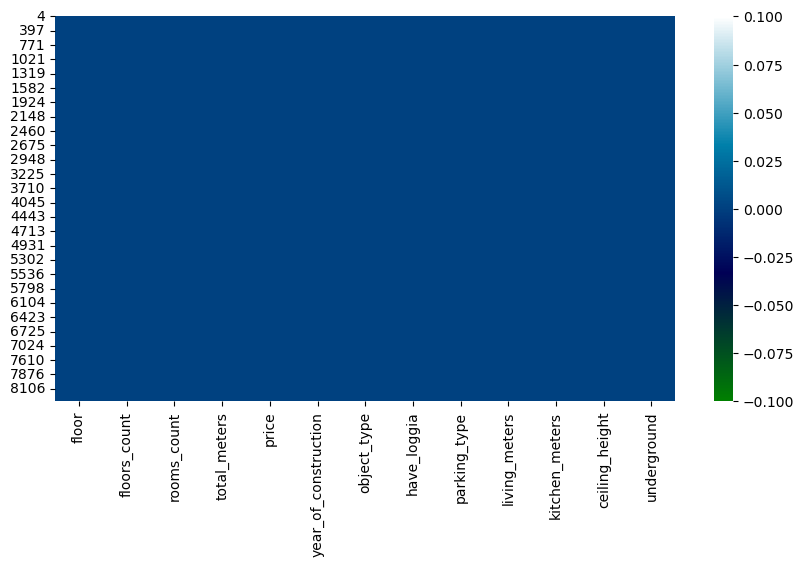

In [347]:
plt.figure(figsize=(10, 5))
sns.heatmap(Data_Purified.isnull(),cmap='ocean')

#### Пропуски отсутствуют

#### Добавим дополнительную колонку

In [350]:
Data_Purified["price_meter"] = Data_Purified["price"] // Data_Purified["total_meters"]

C:\Users\LostBuddha\AppData\Local\Temp\ipykernel_624\3220267737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Purified["price_meter"] = Data_Purified["price"] // Data_Purified["total_meters"]


In [351]:
Data_Purified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3441 entries, 4 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   floor                 3441 non-null   float64
 1   floors_count          3441 non-null   float64
 2   rooms_count           3441 non-null   float64
 3   total_meters          3441 non-null   float64
 4   price                 3441 non-null   int64  
 5   year_of_construction  3441 non-null   float64
 6   object_type           3441 non-null   int64  
 7   have_loggia           3441 non-null   object 
 8   parking_type          3441 non-null   object 
 9   living_meters         3441 non-null   float64
 10  kitchen_meters        3441 non-null   float64
 11  ceiling_height        3441 non-null   float64
 12  underground           3441 non-null   int64  
 13  price_meter           3441 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 403.2+ KB


In [352]:
Data_Purified["price_meter"] = Data_Purified["price_meter"].apply(int)

C:\Users\LostBuddha\AppData\Local\Temp\ipykernel_624\2722614446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Purified["price_meter"] = Data_Purified["price_meter"].apply(int)


In [353]:
Data_Purified["year_of_construction"] = Data_Purified["year_of_construction"].apply(int)

C:\Users\LostBuddha\AppData\Local\Temp\ipykernel_624\141564248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Purified["year_of_construction"] = Data_Purified["year_of_construction"].apply(int)


#### Колонки 


* have_loggia
* parking_type

имеют тип Object Проработаем их      

In [355]:
Data_Purified["parking_type"].value_counts()

parking_type
Наземная          1428
0                 1269
Подземная          475
Открытая           153
Многоуровневая     116
Name: count, dtype: int64

In [356]:
Data_Purified["have_loggia"].value_counts()

have_loggia
1 лоджия               1252
0                      1202
1 балкон                649
2 лоджии                142
1 лоджия, 1 балкон       92
2 балкона                58
3 лоджии                 14
3 балкона                11
1 лоджия, 2 балкона       7
2 лоджии, 1 балкон        6
4 лоджии                  4
2 лоджии, 2 балкона       3
4 балкона                 1
Name: count, dtype: int64

In [357]:
from sklearn import preprocessing

columns = ['have_loggia', 'parking_type']

for col in columns:
  le = preprocessing.LabelEncoder()
  Data_Purified[col] = le.fit_transform(Data_Purified[col])
  integer_mapping = {l: i for i, l in enumerate(le.classes_)}

  

C:\Users\LostBuddha\AppData\Local\Temp\ipykernel_624\3403868143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Purified[col] = le.fit_transform(Data_Purified[col])
C:\Users\LostBuddha\AppData\Local\Temp\ipykernel_624\3403868143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Purified[col] = le.fit_transform(Data_Purified[col])


In [358]:
Data_Purified["have_loggia"].unique()

array([ 0,  2,  1,  6,  5,  9,  3, 11,  4,  7, 10,  8, 12])

In [359]:
Data_Purified["parking_type"].unique()

array([2, 0, 1, 4, 3])

In [360]:
Data_Purified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3441 entries, 4 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   floor                 3441 non-null   float64
 1   floors_count          3441 non-null   float64
 2   rooms_count           3441 non-null   float64
 3   total_meters          3441 non-null   float64
 4   price                 3441 non-null   int64  
 5   year_of_construction  3441 non-null   int64  
 6   object_type           3441 non-null   int64  
 7   have_loggia           3441 non-null   int32  
 8   parking_type          3441 non-null   int32  
 9   living_meters         3441 non-null   float64
 10  kitchen_meters        3441 non-null   float64
 11  ceiling_height        3441 non-null   float64
 12  underground           3441 non-null   int64  
 13  price_meter           3441 non-null   int64  
dtypes: float64(7), int32(2), int64(5)
memory usage: 376.4 KB


#### Проверим Данные на предмет анамалий с помощью Блоксплота 

<function matplotlib.pyplot.show(close=None, block=None)>

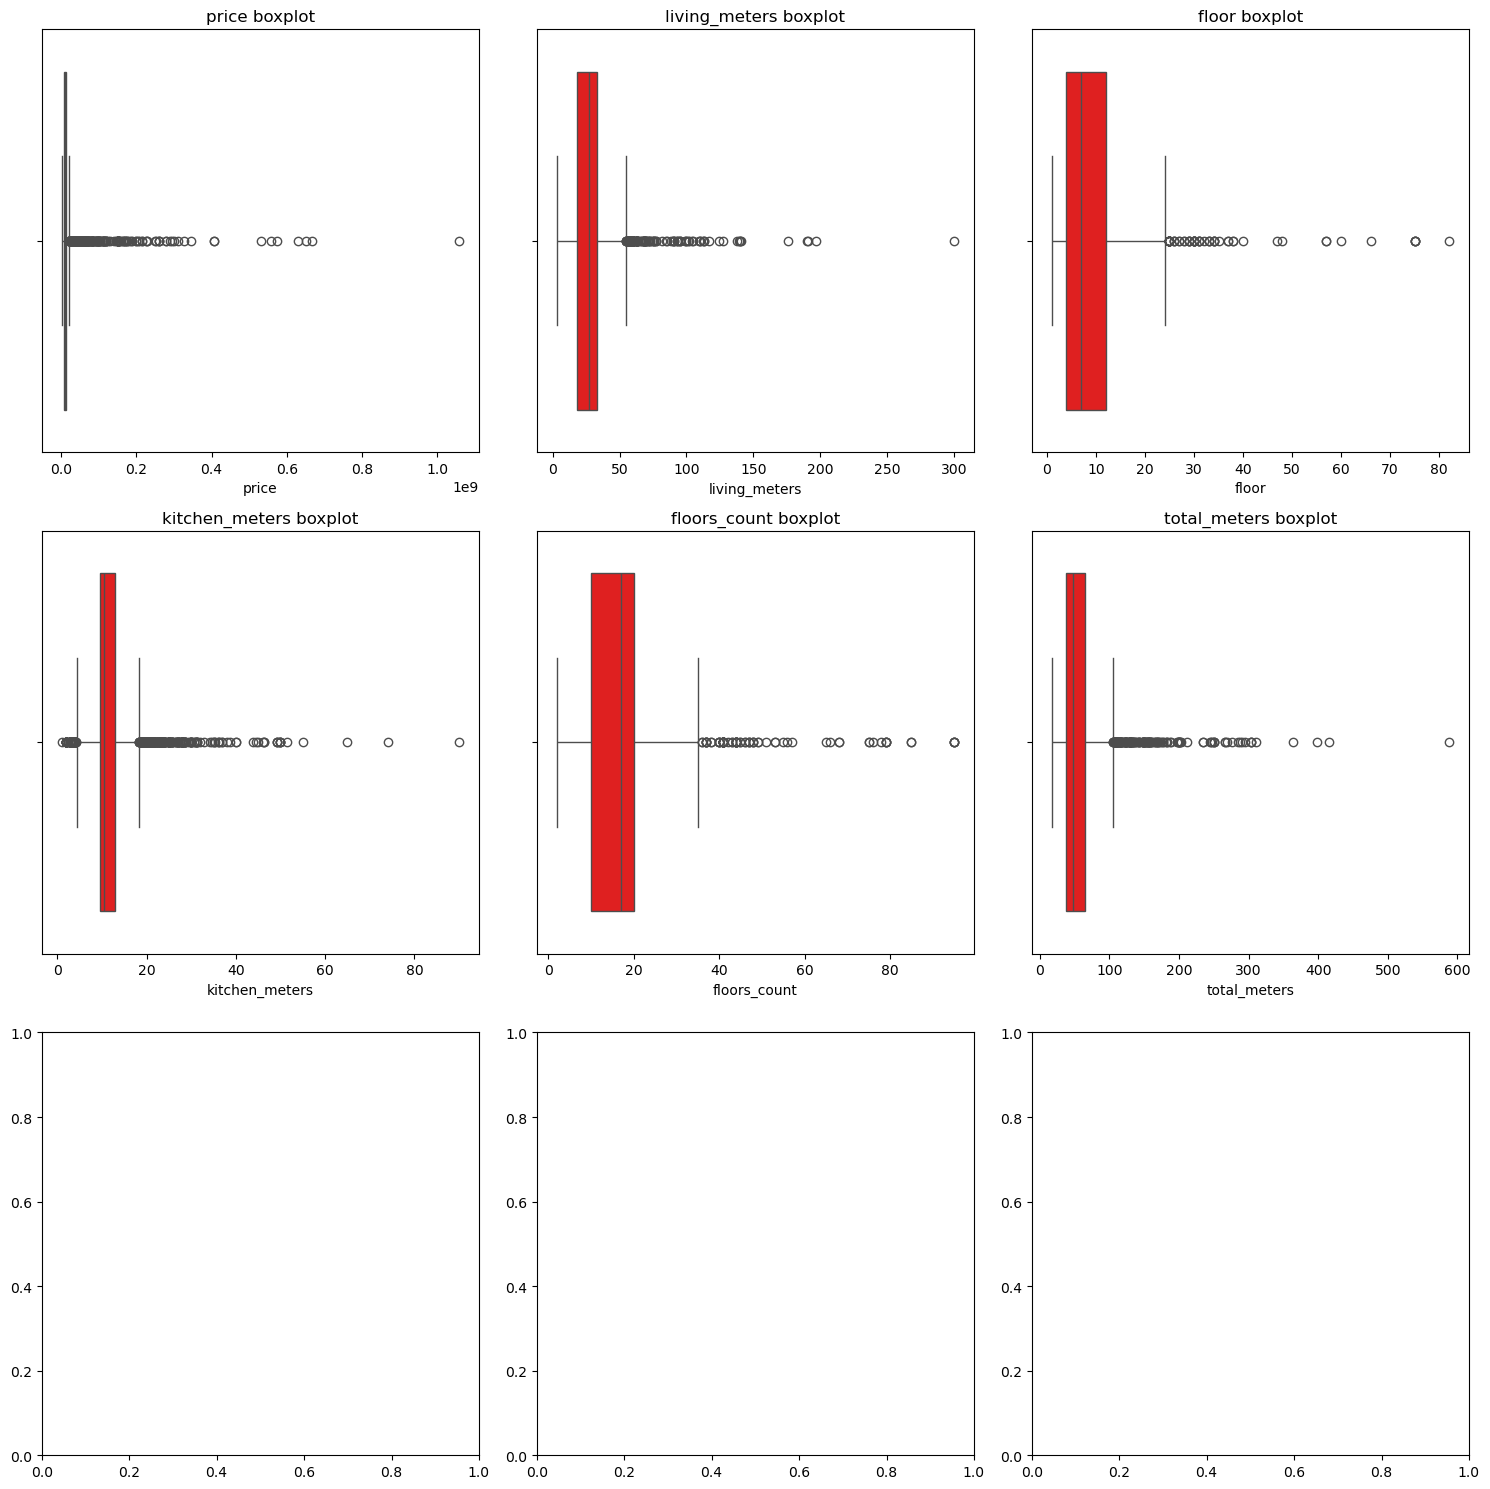

In [362]:
colms = Data_Purified[['price', 'living_meters', 'floor', 'kitchen_meters', 'floors_count', 'total_meters' ]]
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))

for i, column in enumerate(colms):
  row = i//3
  col = i % 3
  sns.boxplot(x=colms[column], ax = axes[row, col], color = 'red')
  axes[row, col].set_title(f'{column} boxplot')

plt.subplots_adjust(hspace = 0.9)
plt.tight_layout()
plt.show

<Axes: xlabel='price'>

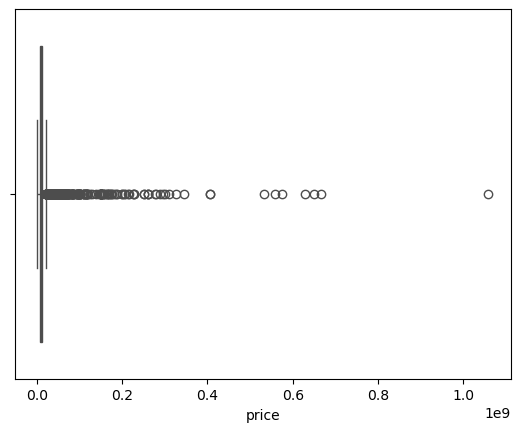

In [363]:
sns.boxplot(x=Data_Purified['price'], color = 'red')

In [364]:
Data_Purified.loc[Data_Purified['price'].nlargest(10).index]

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground,price_meter
5853,66.0,66.0,5.0,588.10,1058580000,2020,1,0,0,27.258128,10.512563,3.90,1,1799999
1153,8.0,9.0,4.0,247.30,666993329,2023,0,0,0,27.258128,10.512563,3.50,1,2697102
2991,5.0,6.0,4.0,203.27,650560000,2024,1,0,0,27.258128,10.512563,2.81,1,3200472
5838,21.0,21.0,5.0,363.30,629417250,2023,1,0,4,190.300000,31.400000,2.81,1,1732499
2998,4.0,4.0,4.0,288.00,574431000,2024,0,5,0,27.258128,20.000000,3.72,1,1994552
3056,5.0,14.0,4.0,198.40,557450000,2024,1,5,4,75.600000,55.000000,3.35,1,2809727
5839,11.0,12.0,5.0,303.00,531661349,2014,0,1,4,117.000000,24.000000,3.20,1,1754657
1157,11.0,13.0,5.0,265.60,405328840,2024,1,0,0,27.258128,10.512563,3.00,1,1526087
5837,11.0,13.0,5.0,265.60,405328840,2024,1,0,0,27.258128,10.512563,3.00,1,1526087
1134,18.0,21.0,4.0,234.30,344593211,2023,1,0,0,27.258128,27.100000,3.00,1,1470735


 строчка 5853 индексом выглядит как аномалия удалим её для более ровного распределений 

In [366]:
Data_Purified.drop(5853, inplace=True)

C:\Users\LostBuddha\AppData\Local\Temp\ipykernel_624\2299995674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Purified.drop(5853, inplace=True)


<Axes: xlabel='price'>

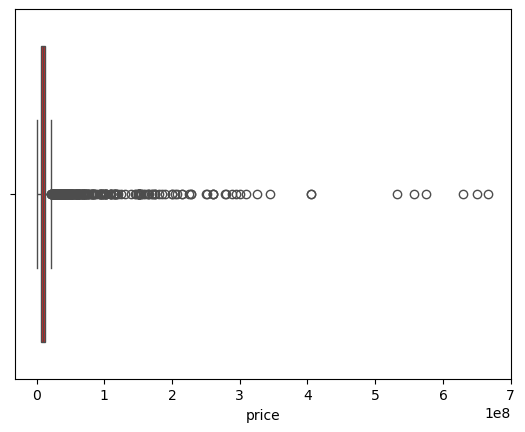

In [367]:
sns.boxplot(x=Data_Purified['price'], color = 'red')

In [368]:
Data_Purified["living_meters"].describe()

count    3440.000000
mean       28.569985
std        15.806374
min         3.000000
25%        18.400000
50%        27.258128
75%        33.000000
max       300.000000
Name: living_meters, dtype: float64

In [369]:
Data_Purified.loc[Data_Purified['living_meters'].nlargest(10).index]

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground,price_meter
1164,23.0,24.0,5.0,415.00,150000000,1998,0,6,4,300.0,74.000000,3.50,1,361445
5849,6.0,6.0,5.0,310.15,325657500,2023,0,0,4,196.9,22.700000,4.55,1,1050000
5861,60.0,75.0,5.0,294.70,294700000,2015,0,0,4,191.0,46.000000,5.00,1,1000000
5838,21.0,21.0,5.0,363.30,629417250,2023,1,0,4,190.3,31.400000,2.81,1,1732499
2984,82.0,85.0,4.0,285.00,251000000,2016,0,0,4,175.8,15.400000,4.50,1,880701
1158,26.0,31.0,5.0,246.70,288063785,2008,0,9,4,140.9,28.000000,3.10,1,1167668
1161,3.0,9.0,5.0,234.80,125000000,1999,0,4,4,140.0,23.000000,2.81,1,532367
5854,57.0,75.0,5.0,304.00,260000000,2010,0,0,0,140.0,90.000000,3.00,1,855263
155,37.0,85.0,3.0,187.50,150562821,2015,1,0,0,139.1,10.512563,2.81,1,803001
167,34.0,57.0,3.0,177.00,150000000,2006,0,0,4,138.0,21.000000,3.10,1,847457


<Axes: xlabel='living_meters'>

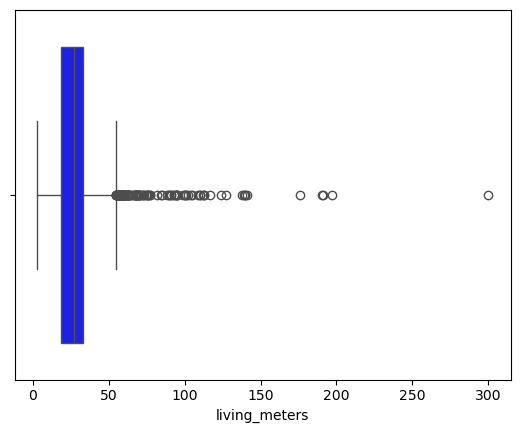

In [370]:
sns.boxplot(x=Data_Purified['living_meters'], color = 'blue')

In [371]:
Data_Purified = Data_Purified[Data_Purified['living_meters'] < 140]

<Axes: xlabel='living_meters'>

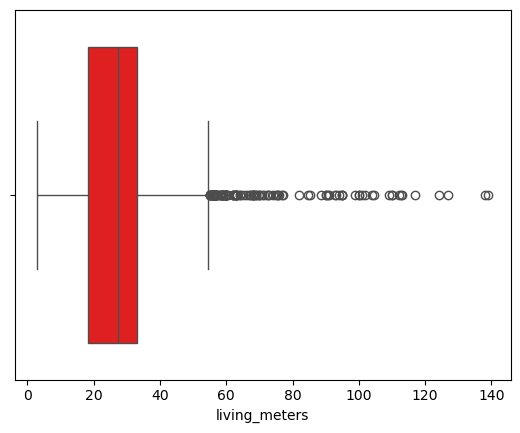

In [372]:
sns.boxplot(x=Data_Purified['living_meters'], color = 'red')

<Axes: xlabel='floor'>

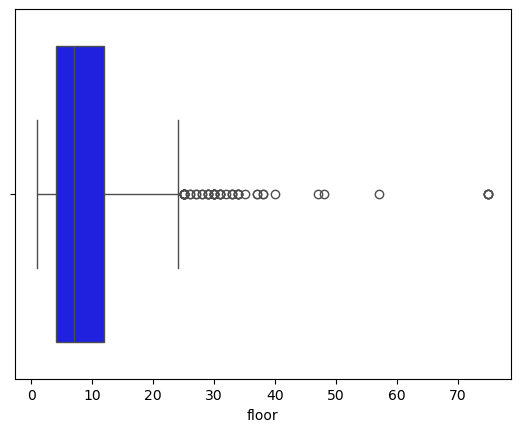

In [373]:
sns.boxplot(x=Data_Purified['floor'], color = 'blue')

In [374]:
Data_Purified.loc[Data_Purified['floor'].nlargest(10).index]

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground,price_meter
617,75.0,95.0,1.0,57.00,47000000,2017,0,0,4,37.000000,10.000000,3.00,1,824561
923,75.0,95.0,1.0,57.00,47000000,2017,0,0,4,37.000000,10.000000,3.00,1,824561
3615,75.0,95.0,1.0,57.00,47000000,2017,0,0,4,37.000000,10.000000,3.00,1,824561
6688,75.0,95.0,1.0,57.00,47000000,2017,0,0,4,37.000000,10.000000,3.00,1,824561
1162,57.0,76.0,5.0,303.40,260000000,2008,0,0,4,27.258128,10.512563,3.20,1,856954
1116,48.0,53.0,1.0,47.50,21549040,2024,1,0,0,27.258128,10.512563,3.00,1,453664
2981,47.0,55.0,4.0,108.36,50000000,2024,1,0,0,27.258128,10.512563,3.20,1,461424
3956,40.0,68.0,2.0,60.00,53000000,2020,0,0,4,40.000000,10.000000,2.81,1,883333
1144,38.0,41.0,4.0,117.83,96620600,2024,1,0,0,112.800000,10.512563,3.20,1,820000
1834,38.0,44.0,2.0,49.50,42500000,2018,0,0,4,32.000000,7.000000,2.81,1,858585


In [375]:
Data_Purified['floor'] = Data_Purified['floor'].apply(int)

In [376]:
Data_Purified['floor'].describe()

count    3432.000000
mean        8.500583
std         6.581197
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        75.000000
Name: floor, dtype: float64

In [377]:
Data_Purified = Data_Purified[Data_Purified["floor"] < 40]

<Axes: xlabel='floor'>

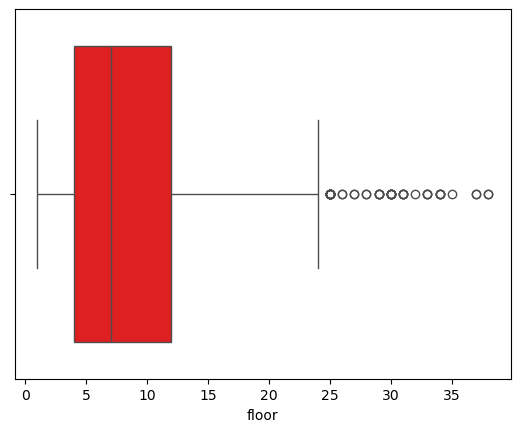

In [378]:
sns.boxplot(x=Data_Purified['floor'], color = 'red')

<Axes: xlabel='kitchen_meters'>

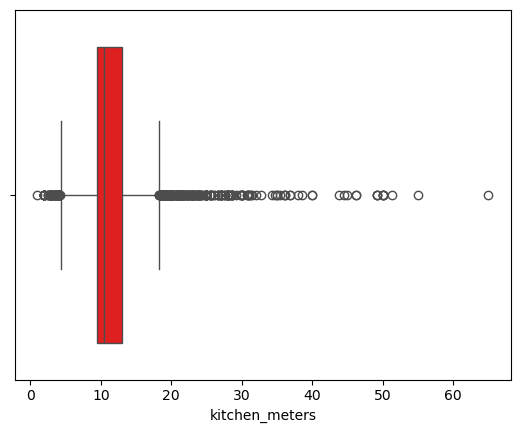

In [379]:
sns.boxplot(x=Data_Purified['kitchen_meters'], color = 'red')

In [380]:
Data_Purified.loc[Data_Purified['kitchen_meters'].nlargest(10).index]

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground,price_meter
1724,1,4.0,2.0,151.6,227400000,2017,0,0,4,50.000000,65.0,3.60,1,1500000
3056,5,14.0,4.0,198.4,557450000,2024,1,5,4,75.600000,55.0,3.35,1,2809727
1141,4,12.0,4.0,148.7,96000000,2019,0,0,0,27.258128,51.4,2.81,1,645595
1151,7,8.0,4.0,199.8,110000000,2001,0,0,4,27.258128,50.0,3.50,1,550550
1178,16,16.0,5.0,269.0,95000000,1999,0,8,4,27.258128,50.0,3.00,1,353159
2994,25,26.0,4.0,250.0,64849000,2005,0,2,4,100.000000,50.0,3.00,1,259396
6475,4,19.0,3.0,101.0,14500000,2011,0,6,4,27.258128,50.0,2.73,1,143564
839,7,23.0,3.0,127.8,27000000,2012,0,0,4,51.400000,49.2,3.00,1,211267
5274,14,20.0,3.0,149.3,22245700,2023,1,6,0,57.300000,49.2,3.35,1,148999
7503,7,23.0,3.0,127.8,27000000,2012,0,0,4,51.400000,49.2,3.00,1,211267


In [381]:
Data_Purified = Data_Purified[Data_Purified['kitchen_meters'] < 40]

<Axes: xlabel='kitchen_meters'>

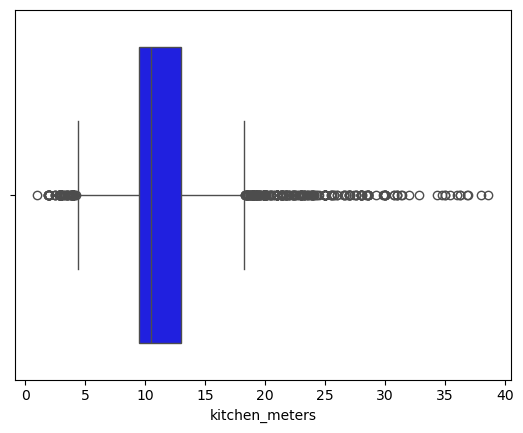

In [382]:
sns.boxplot(x=Data_Purified['kitchen_meters'], color = 'blue')

<Axes: xlabel='floors_count'>

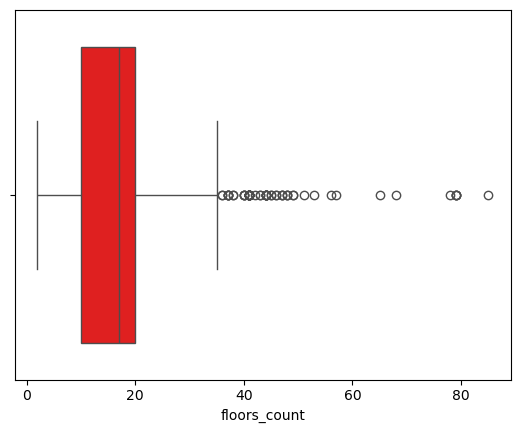

In [383]:
sns.boxplot(x=Data_Purified['floors_count'], color = 'red')

In [384]:
Data_Purified.loc[Data_Purified['floors_count'].nlargest(10).index]

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground,price_meter
155,37,85.0,3.0,187.5,150562821,2015,1,0,0,139.100000,10.512563,2.81,1,803001
220,30,79.0,1.0,78.0,92880000,2019,0,0,4,50.000000,15.000000,2.81,1,1190769
3483,30,79.0,1.0,78.0,92880000,2019,0,0,4,50.000000,15.000000,2.81,1,1190769
4208,30,79.0,1.0,78.0,92880000,2019,0,0,4,50.000000,15.000000,2.81,1,1190769
6760,30,79.0,1.0,78.0,92880000,2019,0,0,4,50.000000,15.000000,2.81,1,1190769
211,16,78.0,2.0,62.0,42000000,2020,0,0,0,27.258128,10.512563,3.90,1,677419
188,9,68.0,2.0,92.0,110000000,2020,0,0,4,54.000000,10.512563,2.81,1,1195652
3947,31,65.0,2.0,51.1,50000000,2021,0,0,4,27.258128,10.512563,3.00,1,978473
167,34,57.0,3.0,177.0,150000000,2006,0,0,4,138.000000,21.000000,3.10,1,847457
2992,6,56.0,4.0,110.1,43100060,2024,1,0,4,71.300000,6.100000,3.10,1,391462


In [385]:
Data_Purified['floors_count'] = Data_Purified['floors_count'].apply(int)

In [386]:
Data_Purified = Data_Purified[Data_Purified['floors_count'] < 50]

<Axes: xlabel='floors_count'>

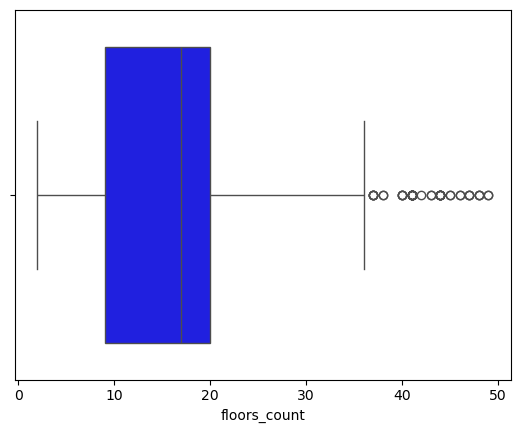

In [387]:
sns.boxplot(x=Data_Purified['floors_count'], color = 'blue')

<Axes: xlabel='total_meters'>

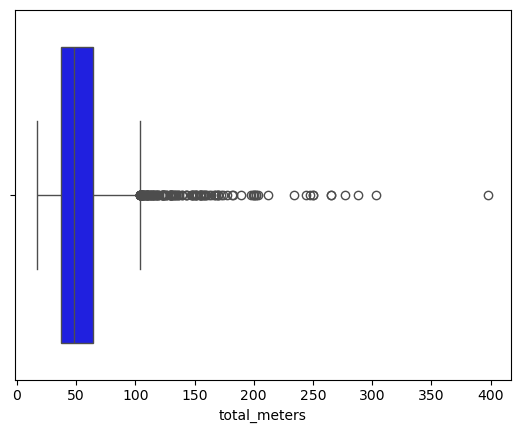

In [388]:
sns.boxplot(x=Data_Purified['total_meters'], color = 'blue')

In [389]:
Data_Purified.loc[Data_Purified['total_meters'].nlargest(10).index]

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,underground,price_meter
5867,1,7,5.0,398.1,170000000,2005,0,0,0,27.258128,20.000000,3.00,1,427028
5839,11,12,5.0,303.0,531661349,2014,0,1,4,117.000000,24.000000,3.20,1,1754657
2998,4,4,4.0,288.0,574431000,2024,0,5,0,27.258128,20.000000,3.72,1,1994552
2644,1,2,3.0,276.9,29999999,1991,0,0,0,62.000000,30.700000,2.95,1,108342
1157,11,13,5.0,265.6,405328840,2024,1,0,0,27.258128,10.512563,3.00,1,1526087
5837,11,13,5.0,265.6,405328840,2024,1,0,0,27.258128,10.512563,3.00,1,1526087
1173,2,8,5.0,250.0,225000000,2010,0,0,4,27.258128,20.000000,3.00,1,900000
3011,17,17,4.0,250.0,160000000,2006,0,0,0,27.258128,10.512563,3.00,1,640000
1153,8,9,4.0,247.3,666993329,2023,0,0,0,27.258128,10.512563,3.50,1,2697102
3054,21,23,4.0,244.1,78000000,2007,0,8,4,27.258128,10.512563,3.00,1,319541


In [390]:
Data_Purified = Data_Purified[Data_Purified['total_meters'] < 200]

<Axes: xlabel='total_meters'>

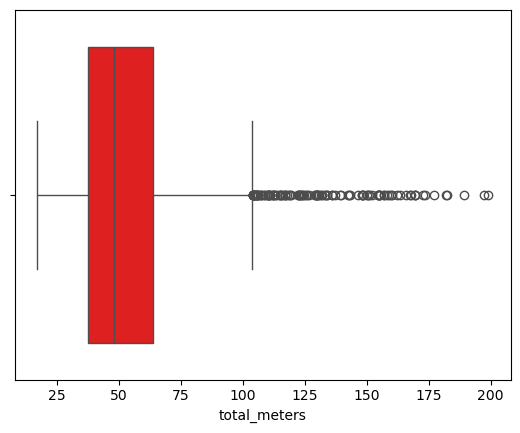

In [391]:
sns.boxplot(x=Data_Purified['total_meters'], color = 'red')

In [392]:
Data_Purified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3378 entries, 4 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   floor                 3378 non-null   int64  
 1   floors_count          3378 non-null   int64  
 2   rooms_count           3378 non-null   float64
 3   total_meters          3378 non-null   float64
 4   price                 3378 non-null   int64  
 5   year_of_construction  3378 non-null   int64  
 6   object_type           3378 non-null   int64  
 7   have_loggia           3378 non-null   int32  
 8   parking_type          3378 non-null   int32  
 9   living_meters         3378 non-null   float64
 10  kitchen_meters        3378 non-null   float64
 11  ceiling_height        3378 non-null   float64
 12  underground           3378 non-null   int64  
 13  price_meter           3378 non-null   int64  
dtypes: float64(5), int32(2), int64(7)
memory usage: 369.5 KB


## Графики

Text(0.5, 1.0, 'Матрица корреляции')

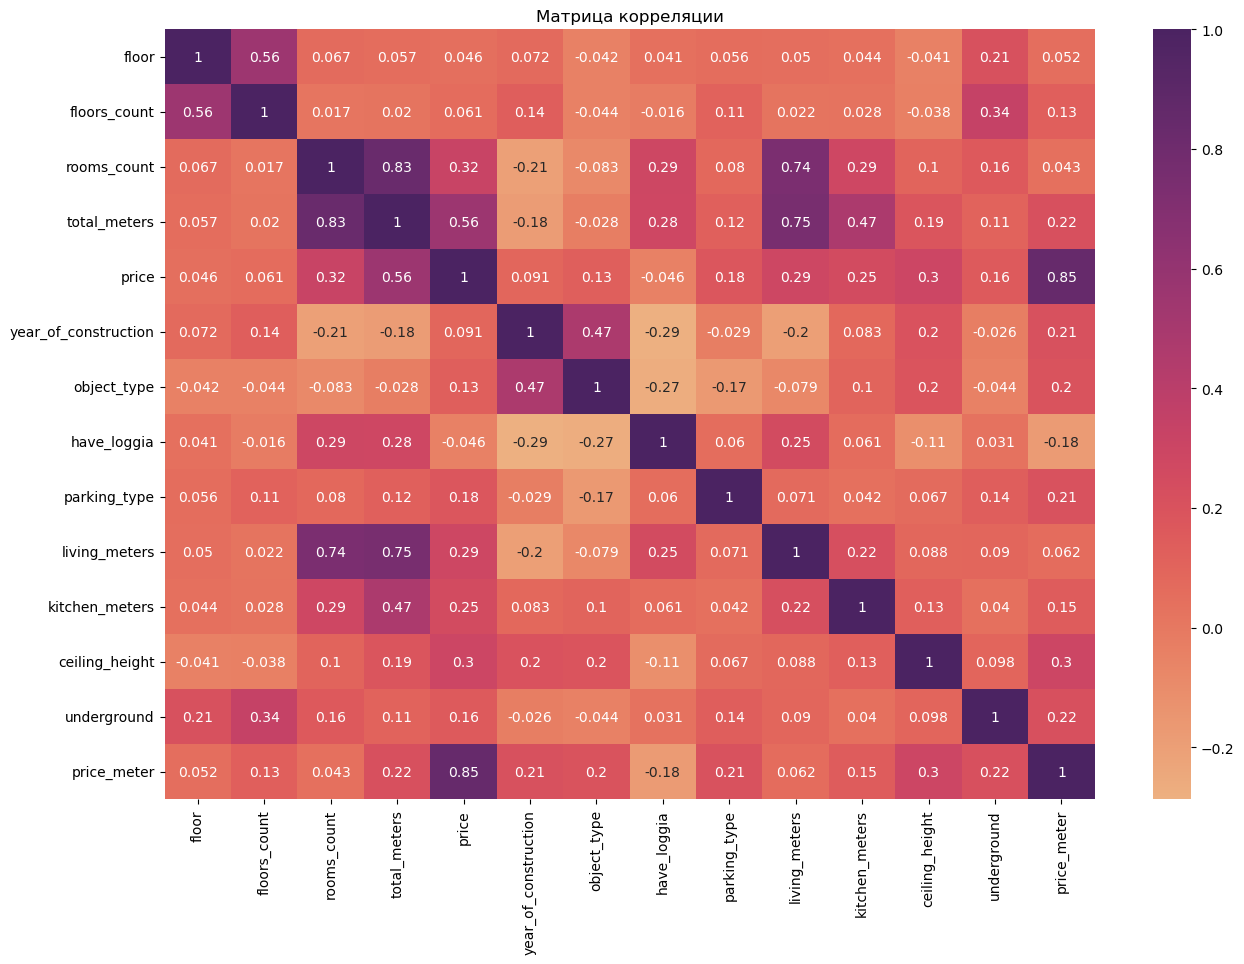

In [394]:
plt.figure(figsize = (15,10))
sns.heatmap(Data_Purified.corr(), cmap = 'flare', annot = True)
plt.title('Матрица корреляции')

#### График 1: Распределение цен на квартиры

### Влияние площади квартиры на цену График, отображающий связь между площадью и ценой, поможет понять, как площадь влияет на стоимость.

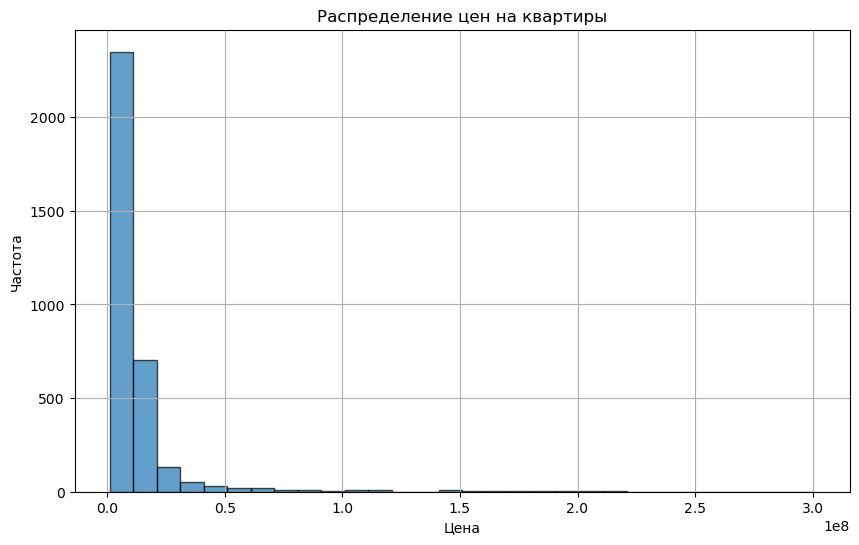

In [397]:
plt.figure(figsize=(10, 6))
plt.hist(Data_Purified['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

### Влияние количества комнат на цену за квадратный метр Этот график позволяет оценить, как меняется цена за квадратный метр в зависимости от количества комнат.

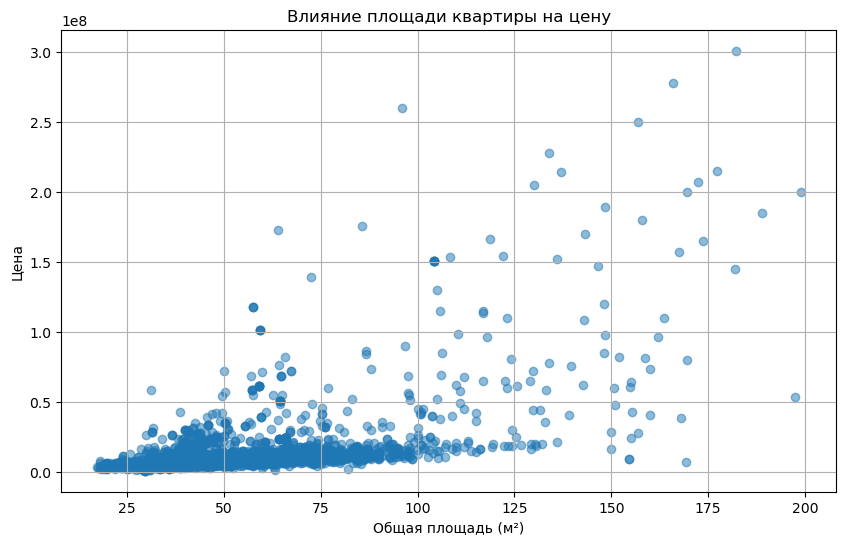

In [560]:
plt.figure(figsize=(10, 6))
plt.scatter(Data_Purified['total_meters'], Data_Purified['price'], alpha=0.5)
plt.title('Влияние площади квартиры на цену')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

### Влияние года постройки на цену График показывает влияние года постройки на цену, что дает представление о тенденциях стоимости по годам

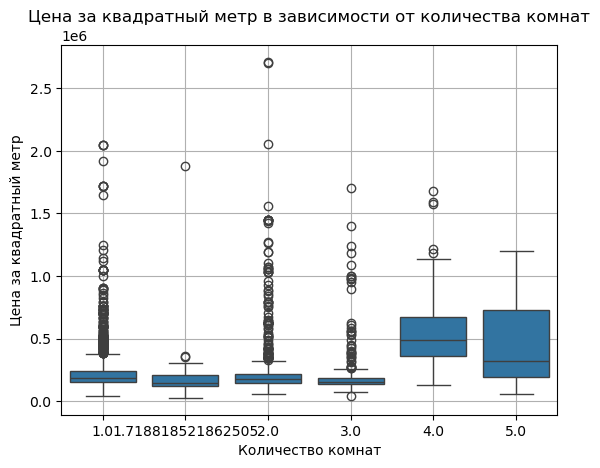

In [566]:
sns.boxplot(x='rooms_count', y='price_meter', data=Data_Purified)
plt.title('Цена за квадратный метр в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за квадратный метр')
plt.grid(True)
plt.show()

### Зависимость цены от этажа Показывает, как цена может меняться в зависимости от этажа, на котором расположена квартира.

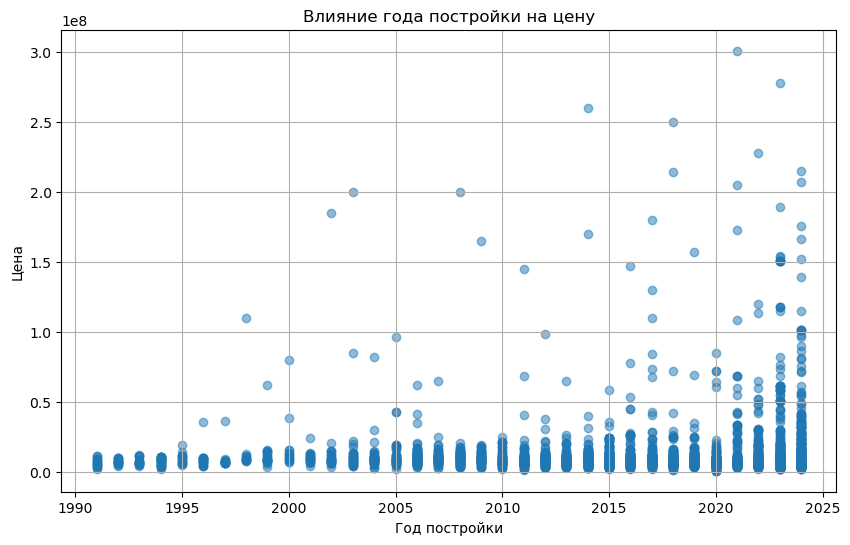

In [568]:
plt.figure(figsize=(10, 6))
plt.scatter(Data_Purified['year_of_construction'], Data_Purified['price'], alpha=0.5)
plt.title('Влияние года постройки на цену')
plt.xlabel('Год постройки')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

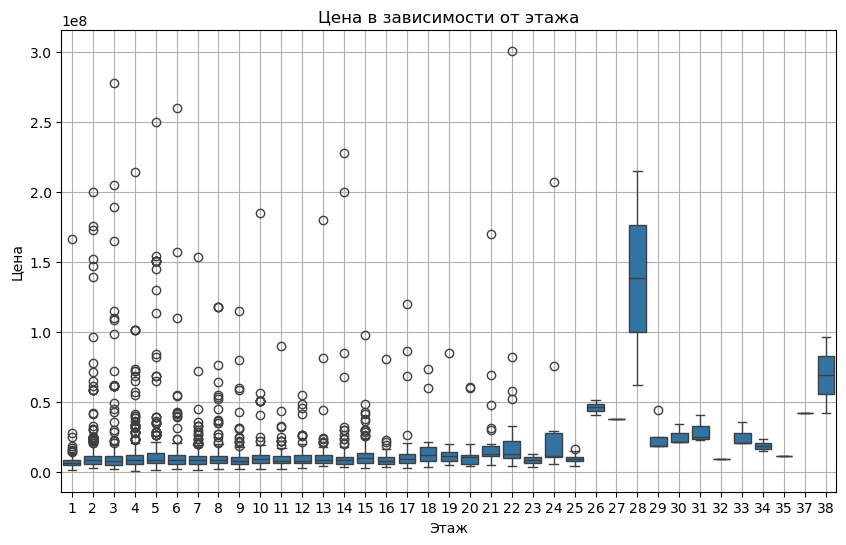

In [573]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='floor', y='price', data=Data_Purified)
plt.title('Цена в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

#### Колонка Price больше нам не нужна удалим её и подготовим данные для обучения модели предсказания цены 

In [604]:
Data_Purified.drop(["price"], axis= 1, inplace=True)

In [606]:
Clin_Data = Data_Purified

In [608]:
Clin_Data.to_csv("Clean_Data.csv")